# Final Data Analysis

### Table of Contents
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Analysis of Syntactical Measures by L1](#Analysis-of-Syntactical-Measures-by-L1)
    * [T-Unit Count per Sentence](#T-Unit-Count-per-Sentence)
    * [Mean T-Unit Length](#Mean-T-Unit-Length)
    * [Clause Count per T-Unit](#Clause-Count-per-T-Unit)
    * [Mean Clause Length](#Mean-Clause-Length)
    * [Preposition Count per Clause](#Preposition-Count-per-Clause)
    * [Subordinating Conjunction Count per Clause](#Subordinating-Conjunction-Count-per-Clause)
- [Conclusion](#Conclusion)

Now that the final dataset has been constructed, it's time to do some actual statistical analysis.

## Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statistics import quantiles
sns.set(rc={'figure.figsize': (20, 10)})

Read TAASSC syntactic measures from pickle file:

In [2]:
taassc_measures = pd.read_pickle("data_samples/taassc-measures.pkl")
taassc_measures = taassc_measures.sort_values(["L1", "level_id"])
taassc_measures.head()

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
0,46702,es5,Arabic,3,1.0,19.000000,1.000000,19.000000,0.500000,0.000000
25,9357,dg5,Arabic,3,1.0,10.571429,1.285714,8.222222,0.384615,0.076923
27,39714,eb5,Arabic,3,1.0,14.800000,2.800000,5.285714,0.071429,0.000000
63,38784,eb5,Arabic,3,1.0,5.000000,1.000000,5.000000,1.000000,0.000000
68,31021,ev4,Arabic,3,1.0,11.000000,2.000000,5.500000,0.500000,0.500000


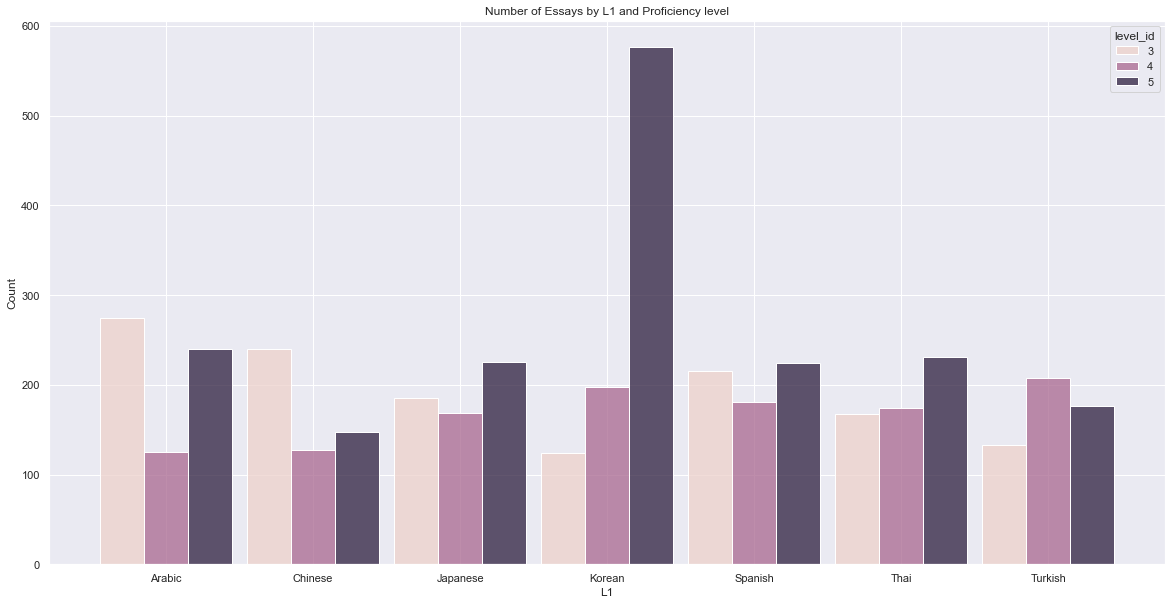

In [3]:
sns.histplot(
    data=taassc_measures,
    x="L1",
    hue="level_id",
    multiple="dodge",
    shrink=0.9
).set(title="Number of Essays by L1 and Proficiency level")
plt.show()

There's a strangely large number of advanced (level 5) Korean essays.
Just to make sure, let's check the number of unique students per L1 by proficiency level:

In [4]:
L1_level_counts = taassc_measures.groupby(["L1", "level_id"])["anon_id"].nunique().reset_index()
L1_level_counts.rename(columns={"anon_id": "count"}, inplace=True)
L1_level_counts

,L1,level_id,count
0,Arabic,3,10
1,Arabic,4,10
2,Arabic,5,10
3,Chinese,3,10
4,Chinese,4,10
5,Chinese,5,10
6,Japanese,3,10
7,Japanese,4,10
8,Japanese,5,10
9,Korean,3,10


Okay, so there's indeed the same number of unique students for every combination of L1 and proficiency level.
Let's plot the average number of essays per user in each group instead:

In [5]:
L1_level_counts["mean_essay_count"] = [
    len(
        taassc_measures[
            (taassc_measures["L1"] == L1_level_counts.iloc[i]["L1"]) &
            (taassc_measures["level_id"] == L1_level_counts.iloc[i]["level_id"])
        ]
    ) / 10 for i in range(len(L1_level_counts))
]
L1_level_counts

,L1,level_id,count,mean_essay_count
0,Arabic,3,10,27.4
1,Arabic,4,10,12.5
2,Arabic,5,10,24.0
3,Chinese,3,10,24.0
4,Chinese,4,10,12.7
5,Chinese,5,10,14.8
6,Japanese,3,10,18.5
7,Japanese,4,10,16.9
8,Japanese,5,10,22.5
9,Korean,3,10,12.4


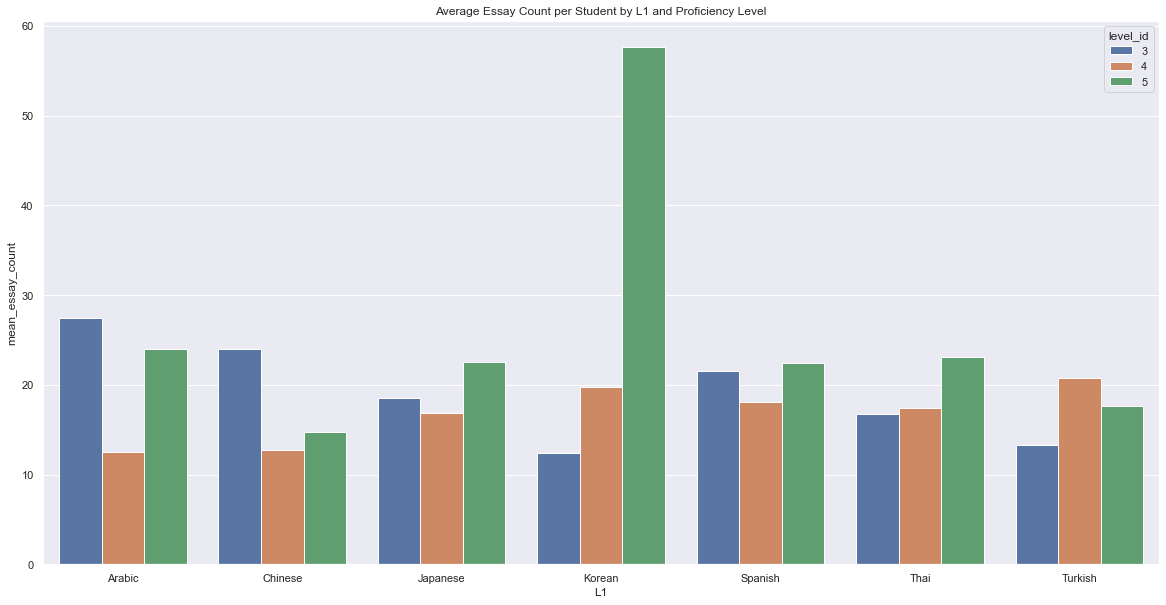

In [6]:
sns.barplot(
    data=L1_level_counts,
    x="L1",
    y="mean_essay_count",
    hue="level_id"
).set(title="Average Essay Count per Student by L1 and Proficiency Level")
plt.show()

That's... really weird.
I have no idea why advanced Korean speakers have so many more essays than any other group.
Could it be because of bad luck with the random sampling?
Or is this a wider trend in the original PELIC dataset?

In [7]:
pelic = pd.read_csv("data/PELIC_compiled.csv")

L1_level_counts_pelic = pelic.groupby(["L1", "level_id"])["anon_id"].nunique().reset_index()
L1_level_counts_pelic.rename(columns={"anon_id": "count"}, inplace=True)
L1_level_counts_pelic = L1_level_counts_pelic[
    L1_level_counts_pelic["L1"].isin(L1_level_counts["L1"]) &
    L1_level_counts_pelic["level_id"].isin(L1_level_counts["level_id"])
]

L1_level_counts_pelic["mean_essay_count"] = [
    len(
        pelic[
            (pelic["L1"] == L1_level_counts_pelic.iloc[i]["L1"]) &
            (pelic["level_id"] == L1_level_counts_pelic.iloc[i]["level_id"])
        ]
    ) / L1_level_counts_pelic.iloc[i]["count"] for i in range(len(L1_level_counts_pelic))
]
L1_level_counts_pelic

,L1,level_id,count,mean_essay_count
1,Arabic,3,244,22.995902
2,Arabic,4,342,17.175439
3,Arabic,5,212,21.358491
7,Chinese,3,86,22.104651
8,Chinese,4,154,19.084416
9,Chinese,5,96,36.635417
33,Japanese,3,21,18.523810
34,Japanese,4,53,22.962264
35,Japanese,5,35,33.600000
37,Korean,3,88,17.613636


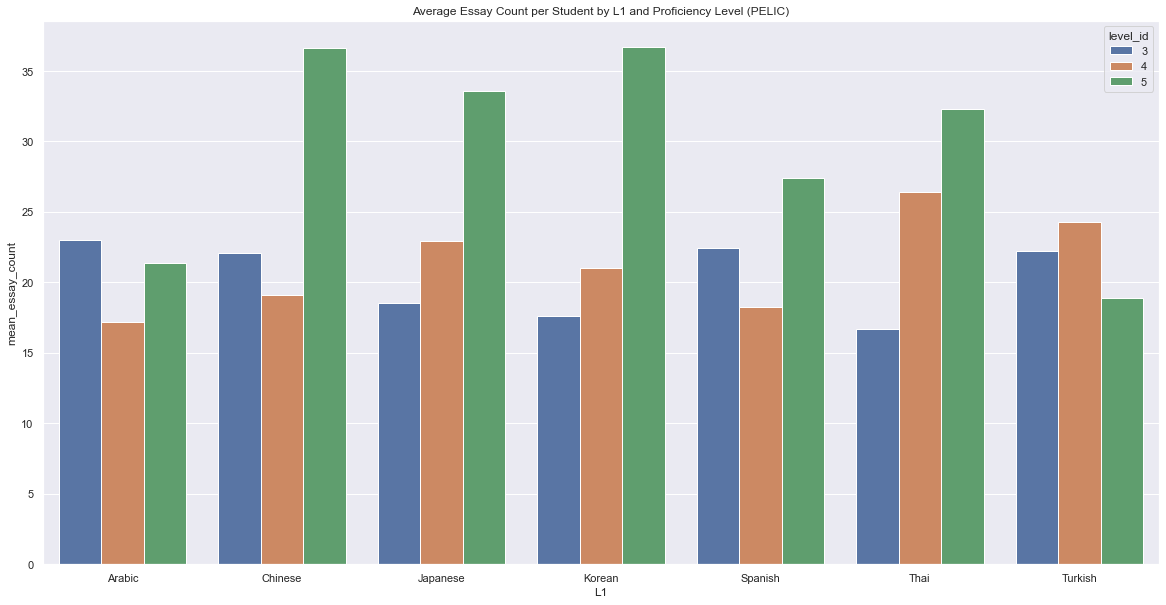

In [8]:
sns.barplot(
    data=L1_level_counts_pelic,
    x="L1",
    y="mean_essay_count",
    hue="level_id"
).set(title="Average Essay Count per Student by L1 and Proficiency Level (PELIC)")
plt.show()

Okay, so it looks like that the distribution of essays isn't nearly as skewed in the original PELIC dataset.
Apparently I just got really unlucky with the random sampling.
Let's check out the distribution of essays for the advanced Korean students in particular just to be sure:

In [9]:
level_counts_korean = taassc_measures[taassc_measures["L1"] == "Korean"]["anon_id"].value_counts().sort_values(ascending=False).reset_index()
level_counts_korean.rename(columns={"index": "anon_id", "anon_id": "count"}, inplace=True)
level_counts_korean

,anon_id,count
0,da3,169
1,fi5,76
2,co5,76
3,gk5,62
4,al5,61
5,ch2,61
6,ay1,60
7,dp5,34
8,fu6,33
9,bq0,32


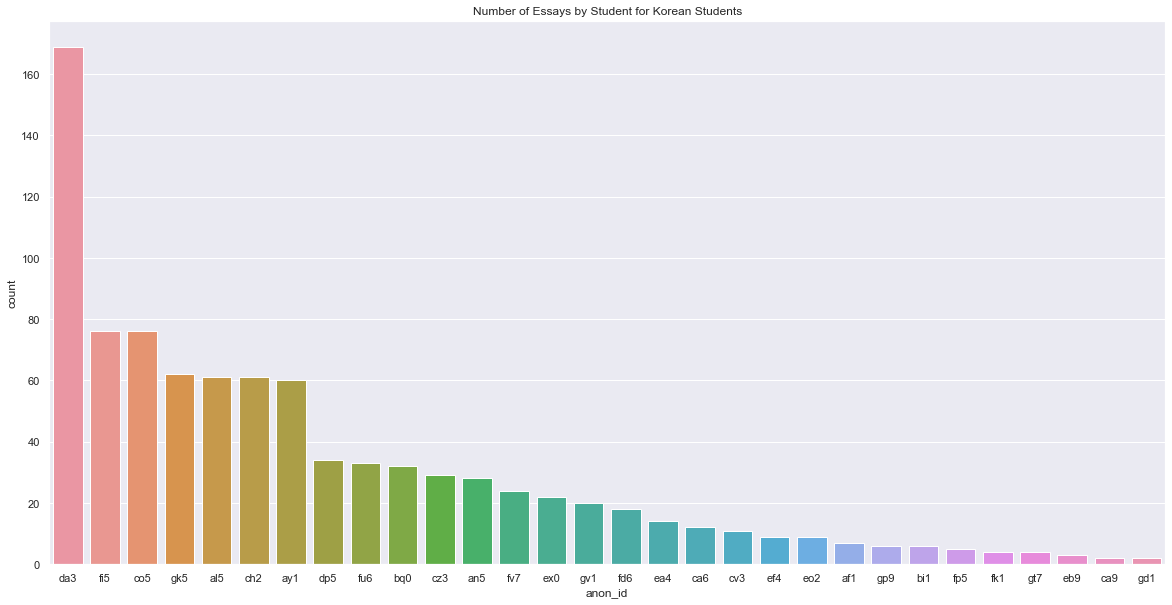

In [10]:
sns.barplot(
    data=level_counts_korean,
    x="anon_id",
    y="count"
).set(title="Number of Essays by Student for Korean Students")
plt.show()

Why does one Korean student have so many more essays than everyone else?
This student has more than twice as many essays as the student with the second-most essays...

Anyway, given that it'd take too long to resample the PELIC data and process it with TAASSC, I don't have much choice but to accept the number of essays from this one Korean student as an outlier.

## Analysis of Syntactical Measures by L1

At this point I'll plot the distributions of the values for each syntactic measure and, if they look okay, perform some basic statistical tests to find trends (or the lack thereof).

It will become apparent that the syntactic measures contain a significant number of outliers that undoubtedly skew the data.
As a way to hopefully mitigate the effects of these outliers, I decided to work with only the middle 90% of values for each syntactic measure (removing anything below the 5th percentile and above the 95% percentile).

### T-Unit Count per Sentence

Let's first plot the original data to take a look at the outliers:

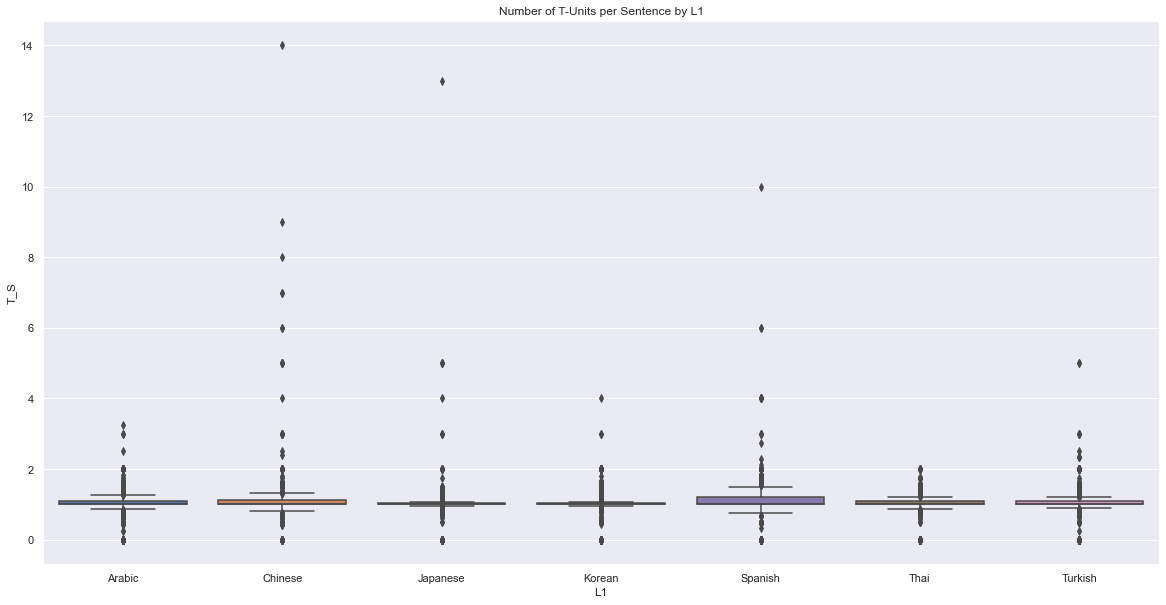

In [11]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="T_S"
).set(title="Number of T-Units per Sentence by L1")
plt.show()

Those are some *really* extreme outliers... TAASSC must've parsed those essays incorrectly.
Let me investigate the 3 most extreme outliers:

In [12]:
# Most extreme outlier with T_S = 14
taassc_measures[(taassc_measures["L1"] == "Chinese") & (taassc_measures["T_S"] == 14)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
3101,10493,fm2,Chinese,3,14.0,9.571429,1.428571,6.7,0.0,0.0


In [13]:
pelic[pelic["answer_id"] == 10493]["text"].iloc[0]

'Pon-ANON_NAME_0 is an island near Taiwan,I went there with my classmates.That was my graduation travel.According to my experience,I think it was the best place to go on a vacation.First of all,we can do many water activiies there,like snorkling and taking a boat,they are very exciting.Second,we can try some dishes which are their traditional foods,the foods were made by local.Third,there are also many good places in Pon-ANON_NAME_0,we can see nature and strange stones,if we go there,we can feel relaxing.The most importantly,there are firework fastival in summer vacation,if we go there on July,we can see fireworks there,they are very wonderful because many pictures like animal and colors in the sky.According to these things,I think the best vacation place is Pon-ANON_NAME_0.'

This essay is completely fine, and there clearly aren't 14 T-units per sentence.

In [14]:
# Second-most extreme outlier with T_S = 13
taassc_measures[(taassc_measures["L1"] == "Japanese") & (taassc_measures["T_S"] == 13)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
2573,47475,dz0,Japanese,4,13.0,19.615385,2.769231,7.083333,0.0,0.0


In [15]:
pelic[pelic["answer_id"] == 47475]["text"].iloc[0]

' Last year,on March 11st,when I woke up,I found that my right leg did not work and I could not stand up.I called my boss and told not to be able to work that day.Around on 3 pm,the earth began to quake suddenly.By the time it ended,I had been staying in my bed.As soon as it had gone,I tried to call 911 or taxi,but it was out of work.I crawled and went out my room, but the elevator was also out of work,so I had to crawled steps.Afterwards,I asked for a man to call 911,but he told me that all cell phones and electricity was not working.I finally got to public phones with crawling;however,there were so many people who were irritated.After waiting for a long time,I called 911,and it told me that all ambulance had been out ,so I needed to wait more than 3 hours.After 3 hours,I rode an ambulance for the first time in my life.I was sent a hospital which was not so far from my home,but it took a long time because of traffic jam.I got a pain relief medicine,but I needed to go back by myself.Th

Same with this essay: there clearly aren't 13 T-units per sentence.

In [16]:
# Third-most extreme outlier with T_S = 10
taassc_measures[(taassc_measures["L1"] == "Spanish") & (taassc_measures["T_S"] == 10)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
4031,22619,cy6,Spanish,4,10.0,8.6,1.5,5.733333,0.235294,0.0


In [17]:
pelic[pelic["answer_id"] == 22619]["text"].iloc[0]

"My partner's name is ANON_NAME_0 ,it doesn't have any meaning in his country and he doesn't have any nickname ; he is from Saudi Arabia ,in his country they used to have a tittle and the tittle that he used is P.T that means Physical Therapist, he is living here 5 months and he is living in Squirrel Hill, he really loves the area, he came here to improve his English he loves do exercises everyday and he will stay here until December."

This one is understandable though, since the entire essay is just one long run-on sentence.

Anyway, let's now take a closer look at the bulk of the values that we'll actually work with:

In [18]:
t_s_filtered = taassc_measures.copy()
for L1 in t_s_filtered["L1"].unique():
    quants = quantiles(t_s_filtered[t_s_filtered["L1"] == L1]["T_S"], n=20) # 5th, 10th, ..., 90th, 95th percentiles
    t_s_filtered = t_s_filtered[
        (t_s_filtered["L1"] != L1) |
        ((t_s_filtered["T_S"] >= quants[0]) & (t_s_filtered["T_S"] <= quants[-1]))  # Filter for only middle 90% of values
    ]

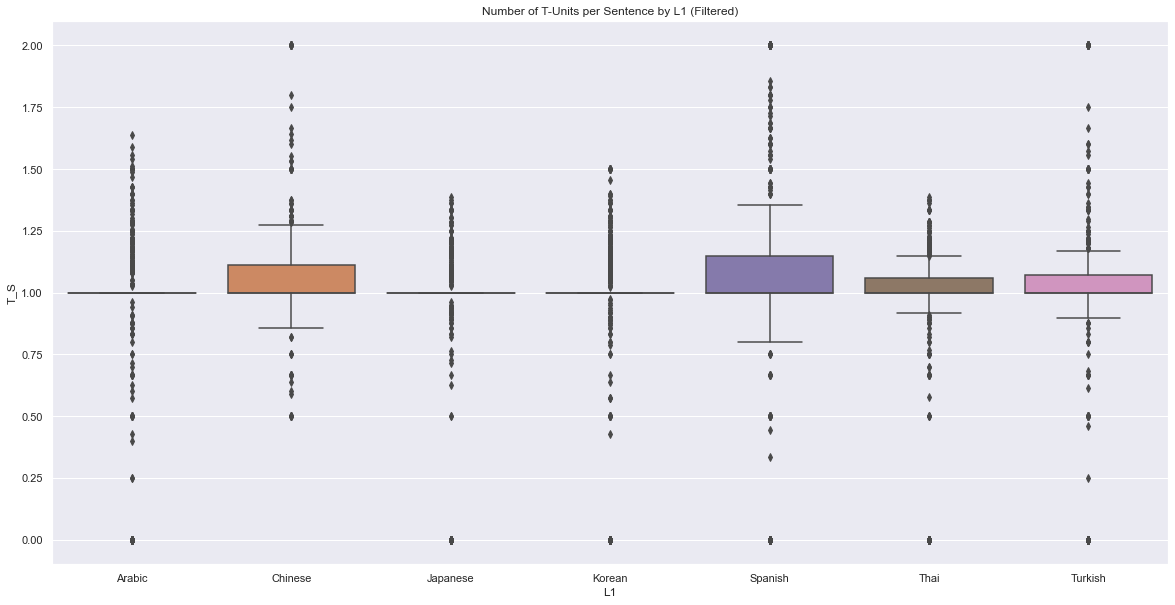

In [19]:
sns.boxplot(
    data=t_s_filtered,
    x="L1",
    y="T_S"
).set(title="Number of T-Units per Sentence by L1 (Filtered)")
plt.show()

Based on the boxplots of the filtered data, the median number of T-units per sentence seems to be fairly consistent at around 1 for all L1s.
However, the distributions of the outliers may actually skew the means one way or another.
Let's perform an ANOVA test to see if there really is a significant difference:

In [20]:
stats.f_oneway(*[t_s_filtered[t_s_filtered["L1"] == L1]["T_S"] for L1 in t_s_filtered["L1"].unique()])

F_onewayResult(statistic=22.243234056523146, pvalue=6.467834804570313e-26)

Okay, there clearly is a statistically significant difference between the mean number of T-units per sentence for each L1.
Judging by the boxplots, it seems that the Chinese essays might have the highest mean number of T-units per sentence because most of its outliers are upper outliers rather than lower outliers.

However, it should still be noted that these were the filtered values and that the most extreme outliers had been removed, and this ultimately removed most of the lower outliers for Chinese.
Furthermore, there are still plenty of outliers in the filtered values, many of which were likely incorrectly calculated like the examples shown previously.

In fact, let's check the correlation between the number of T-units per sentence and proficiency level:

In [21]:
t_s_filtered["T_S"].corr(t_s_filtered["level_id"])

-0.12148807130359464

There seems to be a very weak correlation between number of T-units per sentence and proficiency level, so one can argue that the number of T-units per sentence is simply not that good of a predictor of proficiency level.
I believe that this is exacerbated by how sensitive TAASSC is to run-on sentences, improper punctuation, and other traits of ESL writing.

Here's the same plot as before broken down by proficiency level as well:

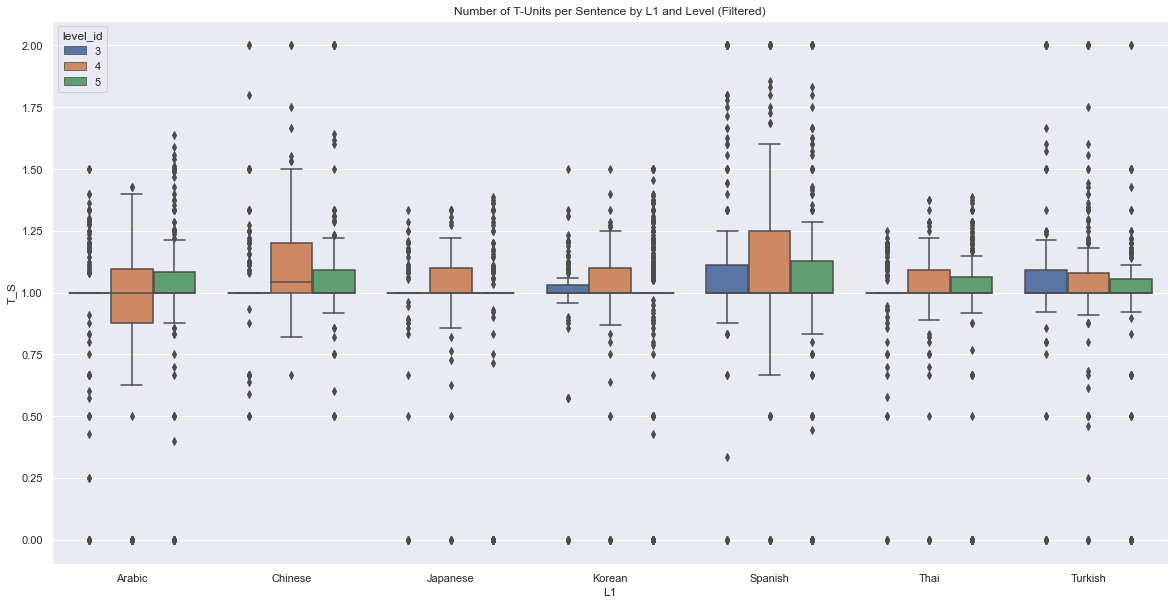

In [22]:
sns.boxplot(
    data=t_s_filtered,
    x="L1",
    y="T_S",
    hue="level_id"
).set(title="Number of T-Units per Sentence by L1 and Level (Filtered)")
plt.show()

Let's perform a couple of basic statistical tests as a demo:

In [23]:
print("ANOVA Tests by L1:")
for L1 in t_s_filtered["L1"].unique():
    print(f"{L1}: {stats.f_oneway(*[t_s_filtered[(t_s_filtered['L1'] == L1) & (t_s_filtered['level_id'] == level)]['T_S'] for level in t_s_filtered['level_id'].unique()]).pvalue}")

ANOVA Tests by L1:
Arabic: 0.00018096312546215092
Chinese: 0.0004985996671817782
Japanese: 5.0525344835849586e-06
Korean: 6.429128446104828e-06
Spanish: 0.00265222234195643
Thai: 0.00304019366328706
Turkish: 0.0006645378034310959


Okay, so the variance between proficiency levels is significant across all L1s, albeit to different degrees.

Also, the boxplots make it appear as if there's a negative trend in the number of T-units per sentence with respect to proficiency level for the Turkish samples.
Let's test to see if the means really are significantly lower for higher proficiency levels:

In [24]:
stats.ttest_ind(
    t_s_filtered[(t_s_filtered["L1"] == "Turkish") & (t_s_filtered["level_id"] == 3)]["T_S"],
    t_s_filtered[(t_s_filtered["L1"] == "Turkish") & (t_s_filtered["level_id"] == 4)]["T_S"],
    alternative="greater"
)

Ttest_indResult(statistic=0.5982635080152828, pvalue=0.27503663157027214)

In [25]:
stats.ttest_ind(
    t_s_filtered[(t_s_filtered["L1"] == "Turkish") & (t_s_filtered["level_id"] == 4)]["T_S"],
    t_s_filtered[(t_s_filtered["L1"] == "Turkish") & (t_s_filtered["level_id"] == 5)]["T_S"],
    alternative="greater"
)

Ttest_indResult(statistic=3.2802248092743076, pvalue=0.0005674523986059809)

These t-tests show that the average number of T-units per sentence for level-3 Turkish essays isn't significantly different from the one for level-4 Turkish essays.
However, the one for level-4 Turkish essays and the one for level-5 Turkish essays *are* significantly different; more specifically, the average number of T-units per sentence is significantly higher for level-4 Turkish essays than level-5 Turkish essays.
This is interesting since one would expect the number of T-units to increase with proficiency level due to longer sentences and use of more complex sentence structures (compound sentences, etc.).
For the Turkish essays in the filtered dataset, at least, this doesn't seem to be the case.

### Mean T-Unit Length

Let's now do the same thing for the mean T-unit length:

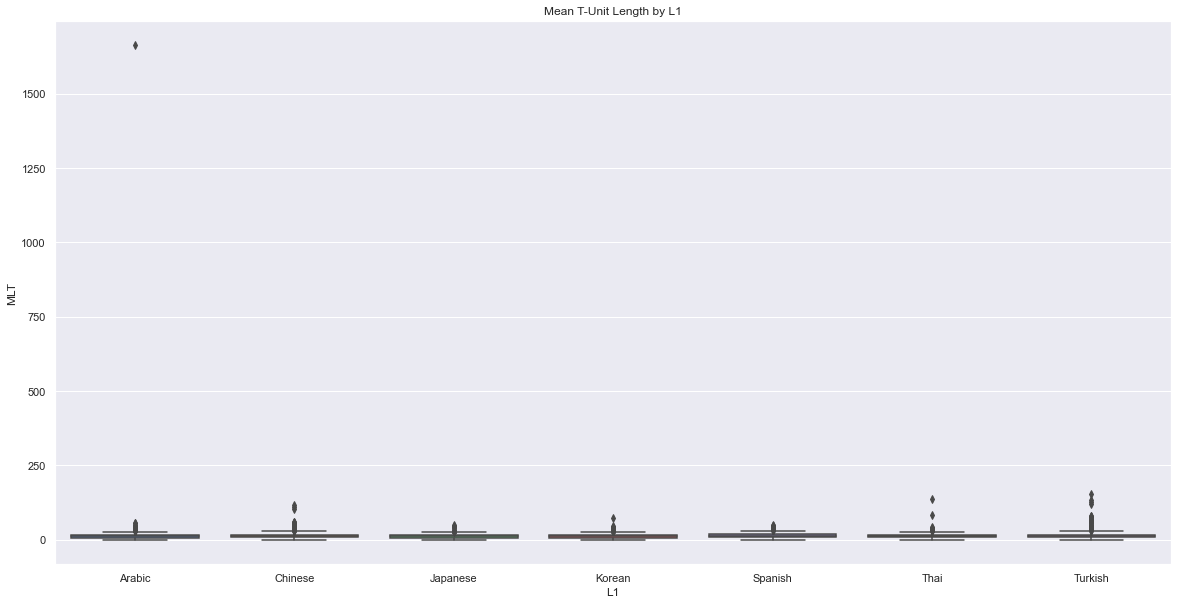

In [26]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="MLT"
).set(title="Mean T-Unit Length by L1")
plt.show()

Okay, let's investigate the most extreme outlier again:

In [27]:
# Most extreme outlier with MLT > 1500
taassc_measures[(taassc_measures["L1"] == "Arabic") & (taassc_measures["MLT"] > 1500)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
383,2250,gj4,Arabic,5,0.5,1663.0,4.0,415.75,0.5,0.0


In [28]:
pelic[pelic["answer_id"] == 2250]["text"].iloc[0]

' In today¡¯s communities all over the world, smokers are a group that is a part that can not be derived from their societies. Smoking have effects on the society and behaviors in addition to \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

Okay, something must've gone *horribly* wrong with this student's essay at some point.
In all honesty, I feel like it's reasonable to consider this essay to be an error and simply remove it from the dataset.

In [29]:
taassc_measures = taassc_measures[taassc_measures["MLT"] < 1500]

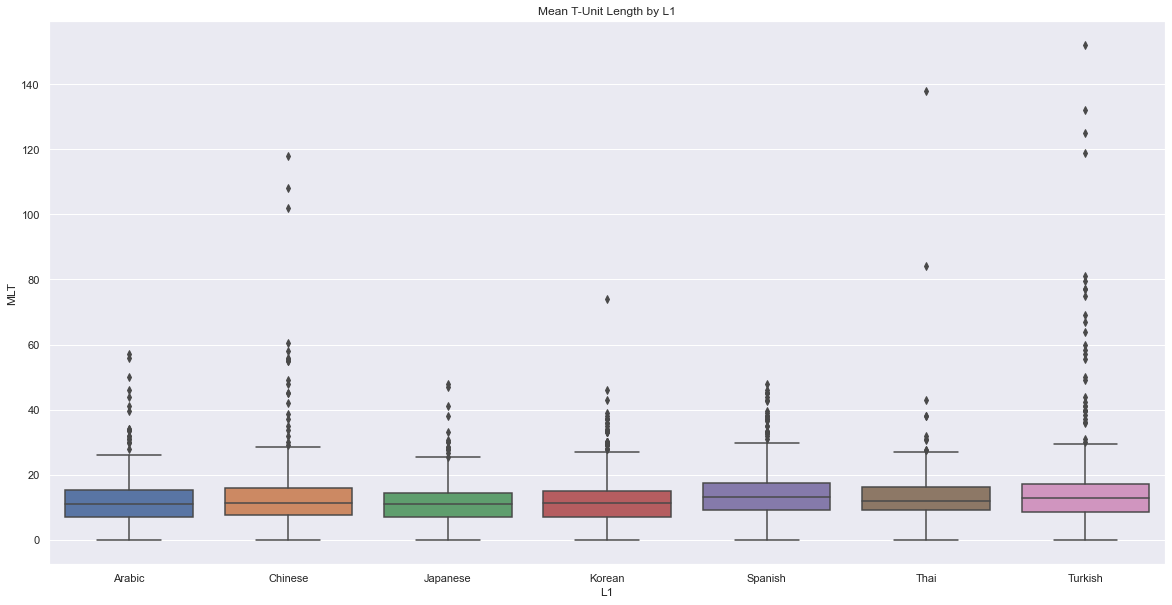

In [30]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="MLT"
).set(title="Mean T-Unit Length by L1")
plt.show()

That's a lot better.
With that one extreme outlier removed, the data looks more regular now.
However, let's still perform the filtering like we did before:

In [31]:
mlt_filtered = taassc_measures.copy()
for L1 in mlt_filtered["L1"].unique():
    quants = quantiles(mlt_filtered[mlt_filtered["L1"] == L1]["MLT"], n=20) # 5th, 10th, ..., 90th, 95th percentiles
    mlt_filtered = mlt_filtered[
        (mlt_filtered["L1"] != L1) |
        ((mlt_filtered["MLT"] >= quants[0]) & (mlt_filtered["MLT"] <= quants[-1]))  # Filter for only middle 90% of values
    ]

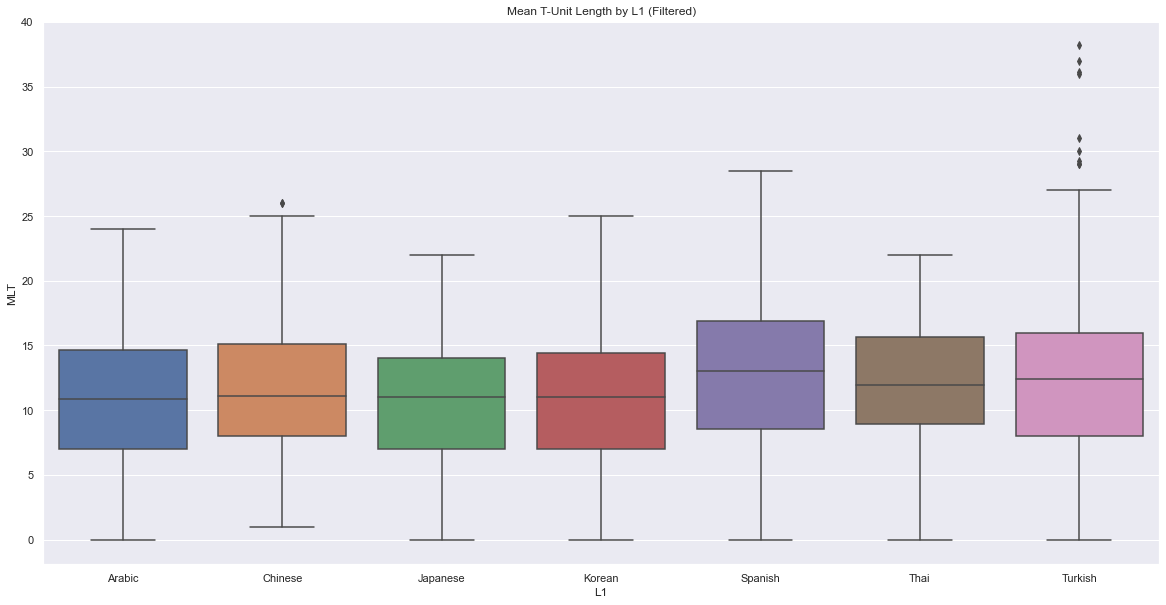

In [32]:
sns.boxplot(
    data=mlt_filtered,
    x="L1",
    y="MLT"
).set(title="Mean T-Unit Length by L1 (Filtered)")
plt.show()

Alright, just for good measure let's perform an ANOVA test again:

In [33]:
stats.f_oneway(*[mlt_filtered[mlt_filtered["L1"] == L1]["MLT"] for L1 in mlt_filtered["L1"].unique()])

F_onewayResult(statistic=15.781074773058782, pvalue=5.258708088332172e-18)

Once again, statistically significant.

Based on the boxplots, it looks like the Spanish essays have significantly longer T-units on average than the Korean essays.
Let's investigate that:

In [34]:
stats.ttest_ind(
    mlt_filtered[mlt_filtered["L1"] == "Spanish"]["MLT"],
    mlt_filtered[mlt_filtered["L1"] == "Korean"]["MLT"],
    alternative="greater"
)

Ttest_indResult(statistic=6.8634719103252655, pvalue=4.97146432796225e-12)

Indeed, the Spanish essays *do* have longer T-units on average than the Korean essays.

Let's now plot the same data again accounting for proficiency level:

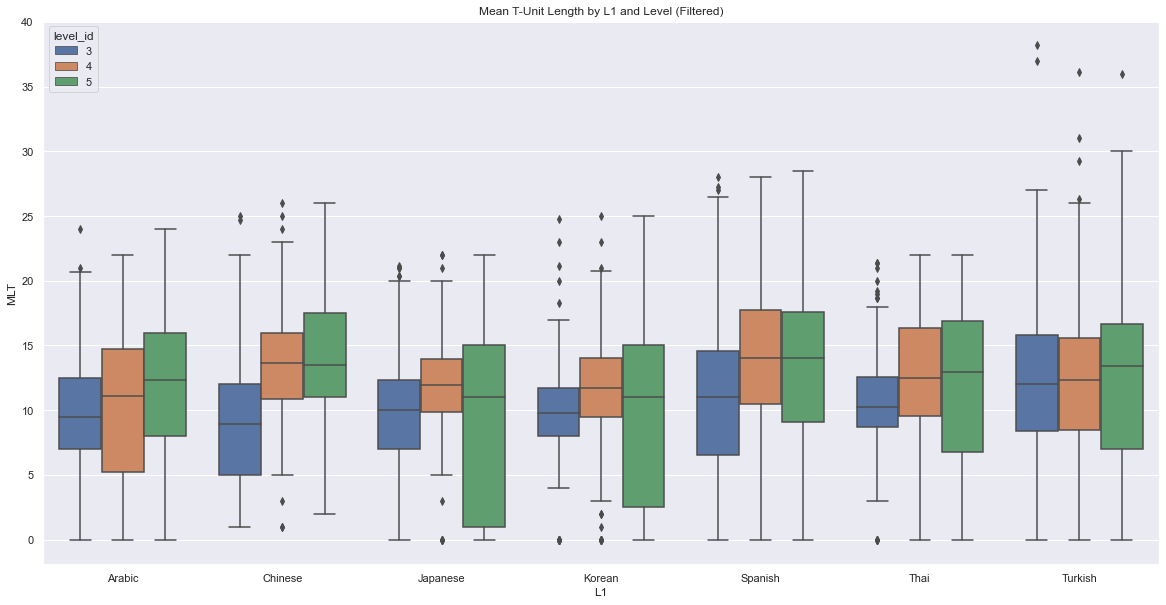

In [35]:
sns.boxplot(
    data=mlt_filtered,
    x="L1",
    y="MLT",
    hue="level_id"
).set(title="Mean T-Unit Length by L1 and Level (Filtered)")
plt.show()

There appears to be a possible increase in the mean T-unit lengths as proficiency level increases.
Let's now run some t-tests to confirm:

In [36]:
print("t-tests by L1:")
for L1 in mlt_filtered["L1"].unique():
    print(f"{L1}: {stats.ttest_ind(mlt_filtered[(mlt_filtered['L1'] == L1) & (mlt_filtered['level_id'] == 5)]['MLT'], mlt_filtered[(mlt_filtered['L1'] == L1) & (mlt_filtered['level_id'] == 3)]['MLT'], alternative='greater').pvalue}")

t-tests by L1:
Arabic: 0.00021074818866997601
Chinese: 3.6539291084670984e-17
Japanese: 0.7800271314492713
Korean: 0.39280644873692694
Spanish: 0.0013210114535422842
Thai: 0.10492759559883538
Turkish: 0.6907752626833898


Interesting... Arabic, Chinese, and Spanish have statistically signficant p-values while the other languages don't.
Although the median values as displayed in the boxplots makes it appear as if they all experience increases in mean T-unit lengths as proficiency level increases, apparently the outliers and skews in the data prevent these differences from being statistically significant.

### Clause Count per T-Unit

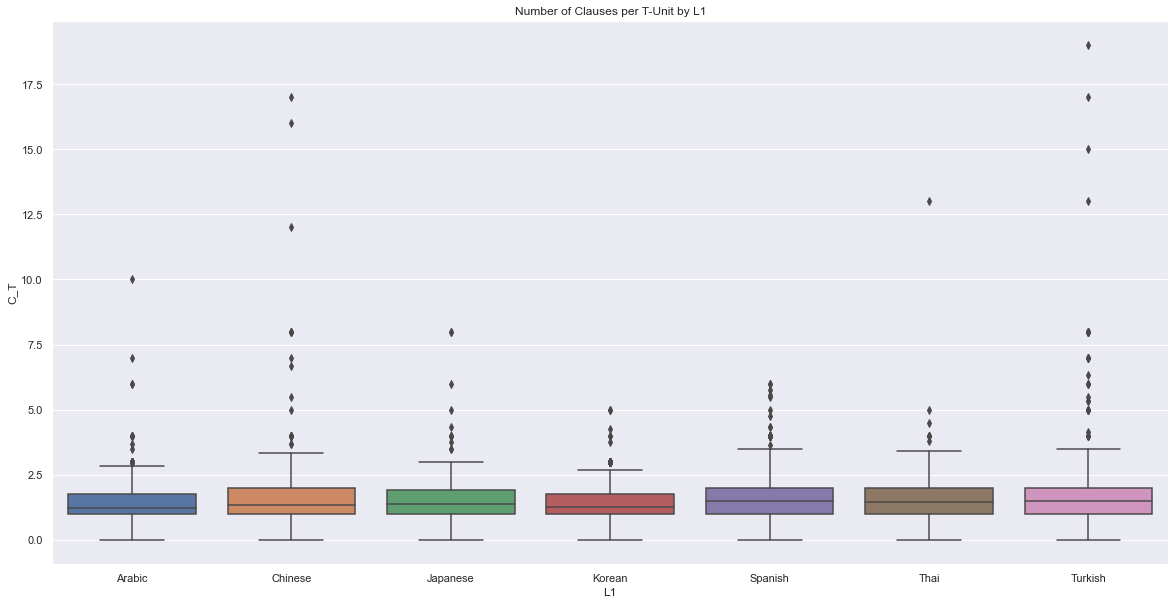

In [37]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="C_T"
).set(title="Number of Clauses per T-Unit by L1")
plt.show()

Once again, let's investigate the most extreme outliers:

In [38]:
taassc_measures[(taassc_measures["L1"] == "Turkish") & (taassc_measures["C_T"] > 17.5)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
4271,22566,bw1,Turkish,3,0.5,152.0,19.0,8.0,0.0,0.0


In [39]:
pelic[pelic["answer_id"] == 22566]["text"].iloc[0]

"BORING WEEKEND\n \n There are a lot of things to do this weekend but Pittsburgh is so cold at these times.First of all I will do my homework on friday night because i don't want to think them anymore.Then I will watch movie in my home.It will be Tim Burton's movie.I am going to sleep on saturday morning until 1 pm.Than I am going to go to Sauth Side to meet my friends.We are going to go to Cheescake Factory.Maybe we can go to Giant Eagle for foods shopping.Probably the weather will be so cold so i will go back to my warm house.Next i will tidy my house.After I will use my computer and i will talk with my family on msn.I don't have any plan on Sunday because the weather is so cold at these days so I am lazy.Finally I love weekends but not in winter time.."

This is a pretty normal essay and definitely doesn't have an absurd number of clauses per T-unit.
Once again, TAASSC must've parsed this one incorrectly...

In [40]:
c_t_filtered = taassc_measures.copy()
for L1 in c_t_filtered["L1"].unique():
    quants = quantiles(c_t_filtered[c_t_filtered["L1"] == L1]["C_T"], n=20) # 5th, 10th, ..., 90th, 95th percentiles
    c_t_filtered = c_t_filtered[
        (c_t_filtered["L1"] != L1) |
        ((c_t_filtered["C_T"] >= quants[0]) & (c_t_filtered["C_T"] <= quants[-1]))  # Filter for only middle 90% of values
    ]

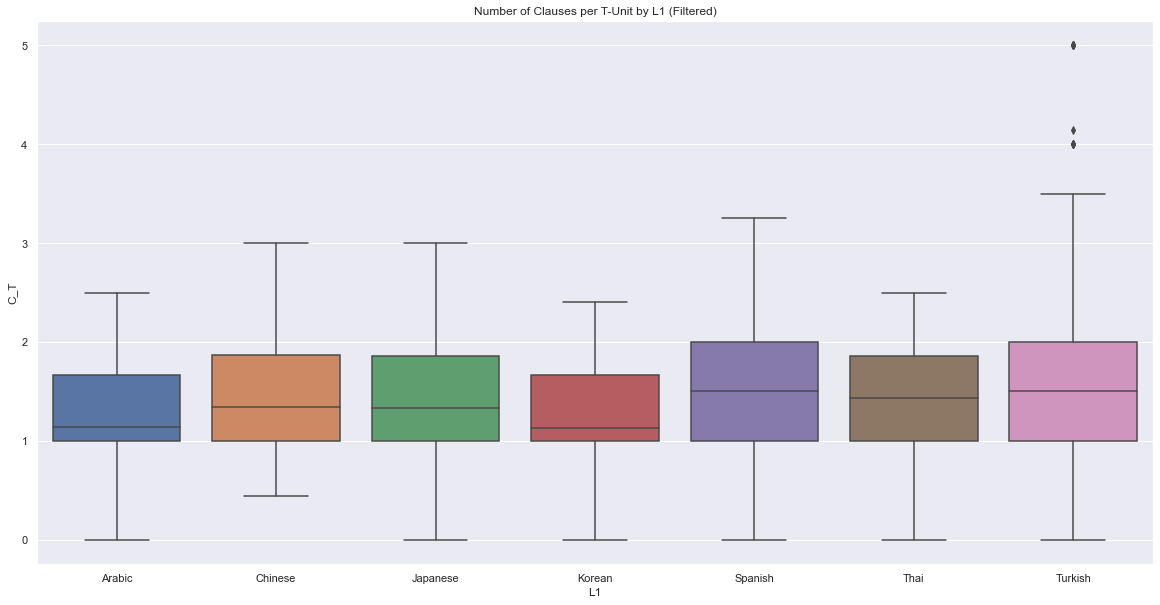

In [41]:
sns.boxplot(
    data=c_t_filtered,
    x="L1",
    y="C_T"
).set(title="Number of Clauses per T-Unit by L1 (Filtered)")
plt.show()

In [42]:
stats.f_oneway(*[c_t_filtered[c_t_filtered["L1"] == L1]["C_T"] for L1 in c_t_filtered["L1"].unique()])

F_onewayResult(statistic=21.949713597082578, pvalue=1.4869547442703217e-25)

Once again, the differences in the values across L1s are statistically significant.

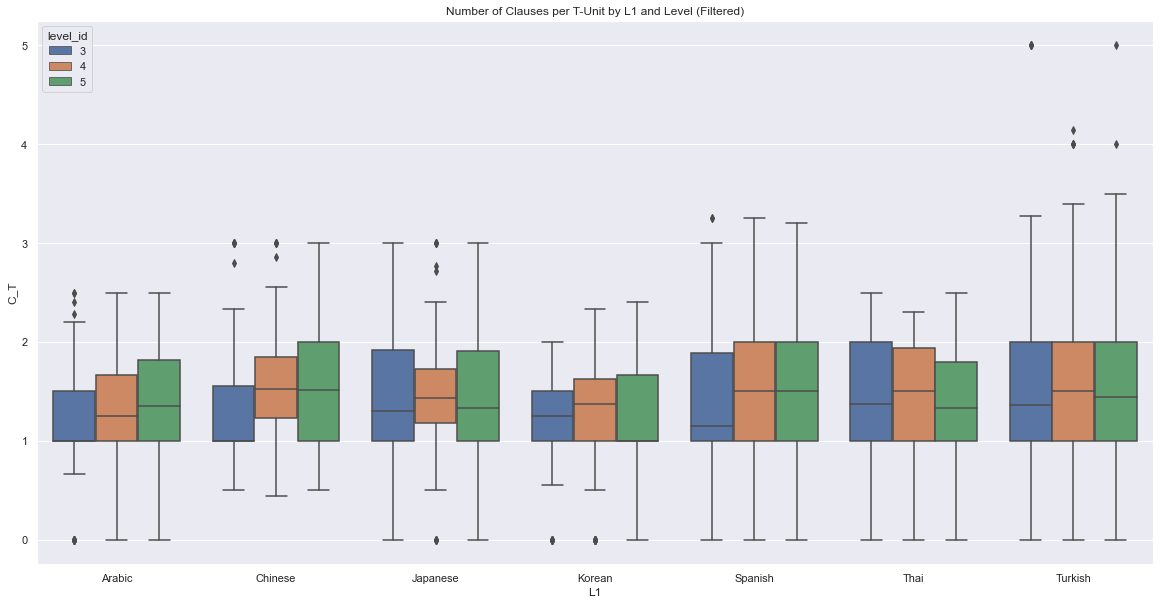

In [43]:
sns.boxplot(
    data=c_t_filtered,
    x="L1",
    y="C_T",
    hue="level_id"
).set(title="Number of Clauses per T-Unit by L1 and Level (Filtered)")
plt.show()

There appears to be a significant increase in number of clauses per T-unit for some languages, so let's test that:

In [44]:
print("t-tests by L1:")
for L1 in c_t_filtered["L1"].unique():
    print(f"{L1}: {stats.ttest_ind(c_t_filtered[(c_t_filtered['L1'] == L1) & (c_t_filtered['level_id'] == 5)]['C_T'], c_t_filtered[(c_t_filtered['L1'] == L1) & (c_t_filtered['level_id'] == 3)]['C_T'], alternative='greater').pvalue}")

t-tests by L1:
Arabic: 0.05095626011625116
Chinese: 2.0314967487116945e-06
Japanese: 0.9351043849142113
Korean: 0.9519840611094249
Spanish: 0.25351323553373056
Thai: 0.9819164555267048
Turkish: 0.9156342349971589


There appears to be a significant increase for Chinese only; Arabic comes close, but its p-value of *just* over 0.05 still requires one to fail to reject the null hypothesis that the means are equal (assuming a significance level of alpha=0.05).

### Mean Clause Length

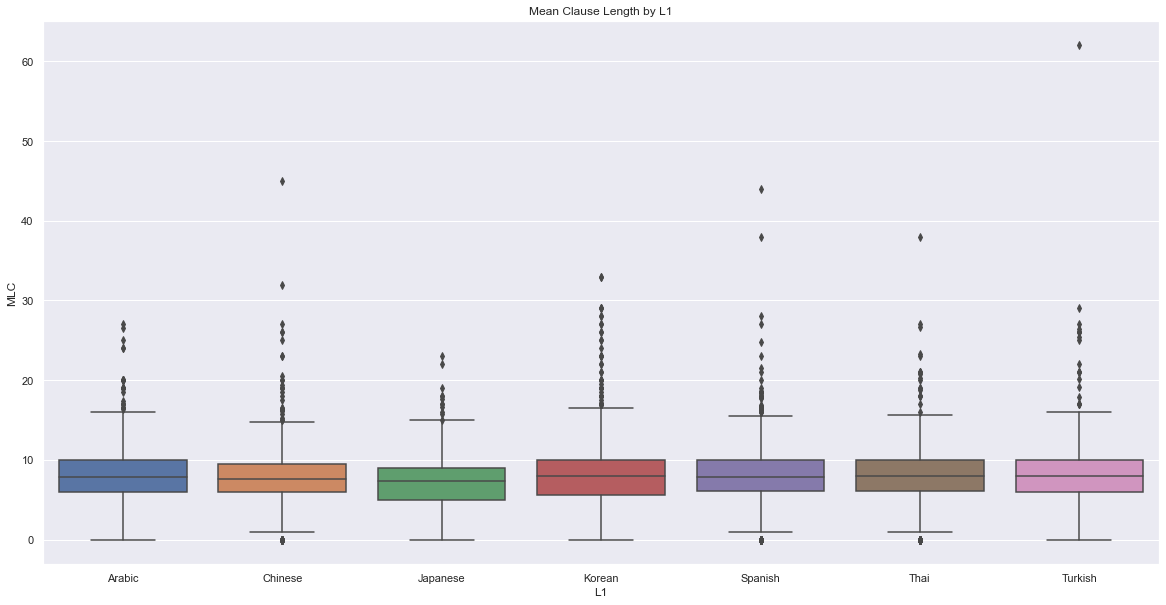

In [45]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="MLC"
).set(title="Mean Clause Length by L1")
plt.show()

Okay, let's do this again...

In [46]:
taassc_measures[(taassc_measures["L1"] == "Turkish") & (taassc_measures["MLC"] > 60)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
1878,22691,co1,Turkish,3,0.0,0.0,0.0,62.0,0.0,0.0


In [47]:
pelic[pelic["answer_id"] == 22691]["text"].iloc[0]

'This a big ballroom in the Peterhoff Palace.This Palace located in city Sankt-Petersburgh of the Russia.Top of the lats very beatiful frescs gold color dancing girls and boys in the Palace.This room very lightly and have a six windows.From windows you can see Finland Creek.Around the ballroom soo much statuetes.This Palace located on the near Baltic Sea.In the Palace every think antique.\n'

I can see how this could've tripped up TAASSC; apart from the lack of whitespace after periods, most of these "sentences" aren't complete sentences.

In [48]:
mlc_filtered = taassc_measures.copy()
for L1 in mlc_filtered["L1"].unique():
    quants = quantiles(mlc_filtered[mlc_filtered["L1"] == L1]["MLC"], n=20) # 5th, 10th, ..., 90th, 95th percentiles
    mlc_filtered = mlc_filtered[
        (mlc_filtered["L1"] != L1) |
        ((mlc_filtered["MLC"] >= quants[0]) & (mlc_filtered["MLC"] <= quants[-1]))  # Filter for only middle 90% of values
    ]

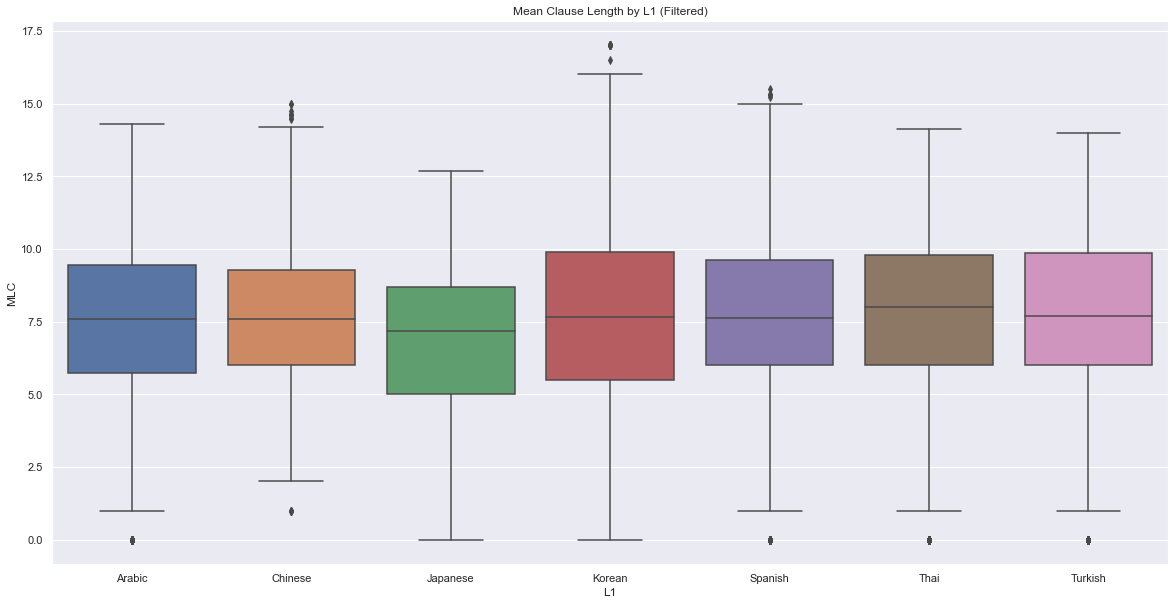

In [49]:
sns.boxplot(
    data=mlc_filtered,
    x="L1",
    y="MLC"
).set(title="Mean Clause Length by L1 (Filtered)")
plt.show()

The distributions look pretty equal this time... would this still test as statistically significant?

In [50]:
stats.f_oneway(*[mlc_filtered[mlc_filtered["L1"] == L1]["MLC"] for L1 in mlc_filtered["L1"].unique()])

F_onewayResult(statistic=6.461755361445343, pvalue=8.545283509066648e-07)

Alright, still statistically significant.

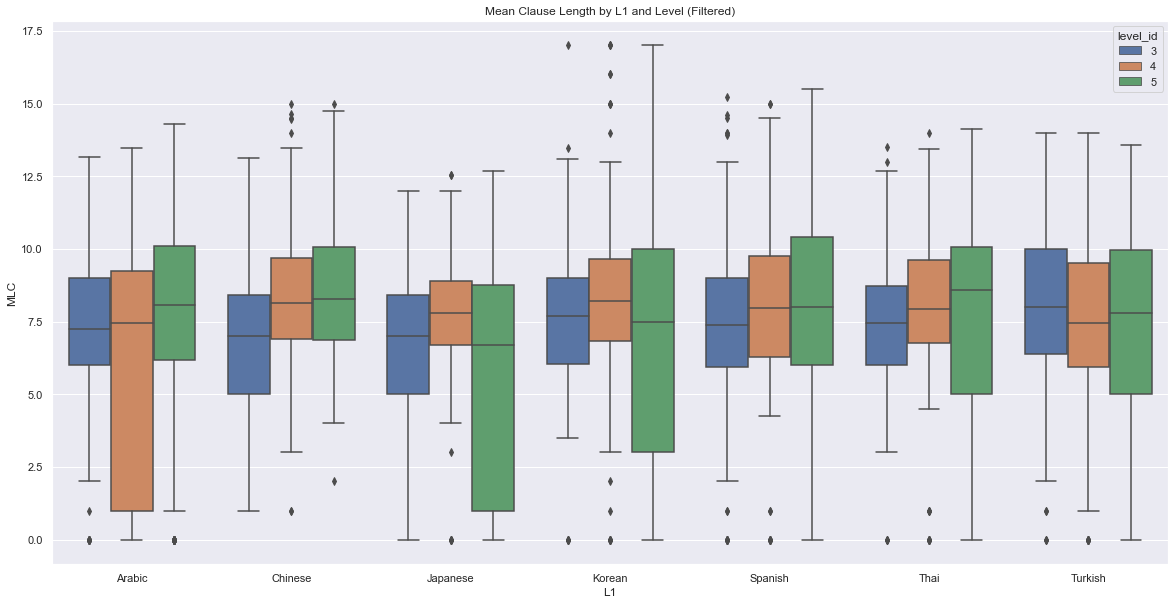

In [51]:
sns.boxplot(
    data=mlc_filtered,
    x="L1",
    y="MLC",
    hue="level_id"
).set(title="Mean Clause Length by L1 and Level (Filtered)")
plt.show()

In [52]:
print("t-tests by L1:")
for L1 in mlc_filtered["L1"].unique():
    print(f"{L1}: {stats.ttest_ind(mlc_filtered[(mlc_filtered['L1'] == L1) & (mlc_filtered['level_id'] == 5)]['MLC'], mlc_filtered[(mlc_filtered['L1'] == L1) & (mlc_filtered['level_id'] == 3)]['MLC'], alternative='greater').pvalue}")

t-tests by L1:
Arabic: 0.21979128441077556
Chinese: 2.5577026794886764e-10
Japanese: 0.9982286771388522
Korean: 0.8838679051462617
Spanish: 0.18003072238846912
Thai: 0.4595905466881883
Turkish: 0.9966505051130867


Okay, so it looks like Chinese is the only L1 with a statistically significant increase in mean clause length.

### Preposition Count per Clause

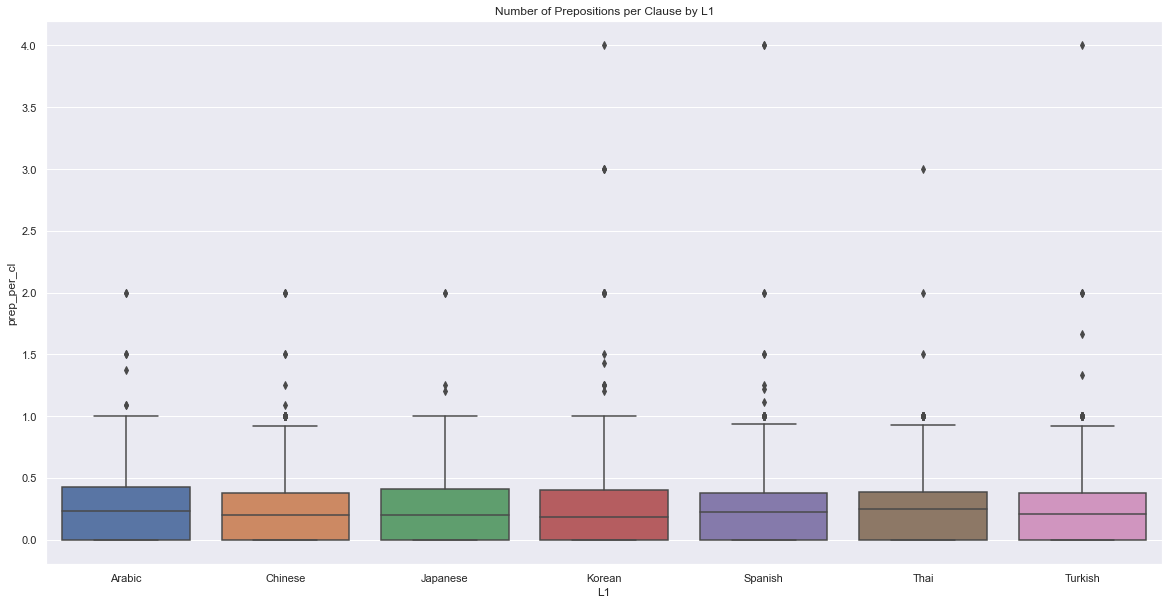

In [53]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="prep_per_cl"
).set(title="Number of Prepositions per Clause by L1")
plt.show()

More extreme outliers:

In [54]:
taassc_measures[(taassc_measures["L1"] == "Korean") & (taassc_measures["prep_per_cl"] == 4)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
1027,16072,da3,Korean,5,1.0,10.0,1.0,10.0,4.0,0.0


In [55]:
pelic[pelic["answer_id"] == 16072]["text"].iloc[0]

'Stereotypes could lead to prejudice, discrimation, persecution or even genocide. '

There's only 1 preposition in this essay (and also only 1 clause), so I'm not sure how TAASSC managed to count 4 prepositions per clause.

In [56]:
taassc_measures[(taassc_measures["L1"] == "Spanish") & (taassc_measures["prep_per_cl"] == 4)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
3848,16203,dk0,Spanish,5,1.0,14.0,1.0,14.0,4.0,0.0
4093,21623,eo8,Spanish,5,1.0,28.0,1.0,28.0,4.0,0.0


In [57]:
pelic[pelic["answer_id"] == 16203]["text"].iloc[0]

'According to the author, improper stereotypes contribute to prejudice, discrimination, persecution or even genocide. '

Once again, this looks perfectly fine to me, and there definitely aren't 4 prepositions per clause.

In [58]:
pelic[pelic["answer_id"] == 21623]["text"].iloc[0]

"Dr. Dirkmaat's graduate students assembled the framework of a single male skeleton with a partial skull, ribs, vertebrae and bones of the arms, legs, hands and feet"

This one is also fine.

In [59]:
prep_filtered = taassc_measures.copy()
for L1 in prep_filtered["L1"].unique():
    quants = quantiles(prep_filtered[prep_filtered["L1"] == L1]["prep_per_cl"], n=20) # 5th, 10th, ..., 90th, 95th percentiles
    prep_filtered = prep_filtered[
        (prep_filtered["L1"] != L1) |
        ((prep_filtered["prep_per_cl"] >= quants[0]) & (prep_filtered["prep_per_cl"] <= quants[-1]))  # Filter for only middle 90% of values
    ]

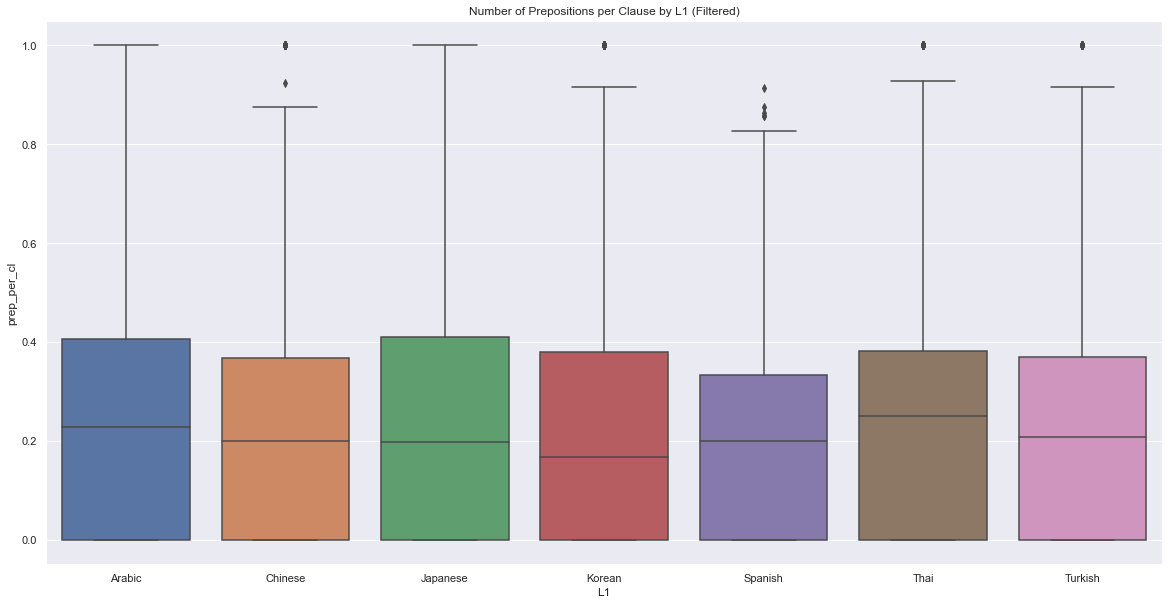

In [60]:
sns.boxplot(
    data=prep_filtered,
    x="L1",
    y="prep_per_cl"
).set(title="Number of Prepositions per Clause by L1 (Filtered)")
plt.show()

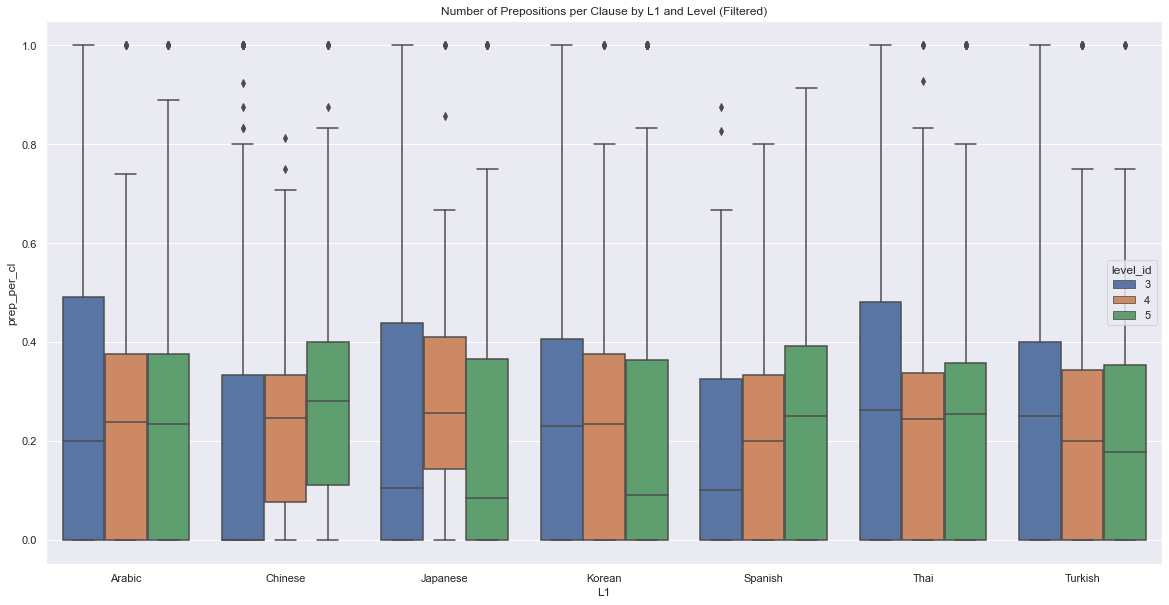

In [61]:
sns.boxplot(
    data=prep_filtered,
    x="L1",
    y="prep_per_cl",
    hue="level_id"
).set(title="Number of Prepositions per Clause by L1 and Level (Filtered)")
plt.show()

In [62]:
print("t-tests by L1:")
for L1 in prep_filtered["L1"].unique():
    print(f"{L1}: {stats.ttest_ind(prep_filtered[(prep_filtered['L1'] == L1) & (prep_filtered['level_id'] == 5)]['prep_per_cl'], prep_filtered[(prep_filtered['L1'] == L1) & (prep_filtered['level_id'] == 3)]['prep_per_cl'], alternative='greater').pvalue}")

t-tests by L1:
Arabic: 0.8948558364008905
Chinese: 0.00209682303090034
Japanese: 0.8752005983296709
Korean: 0.9480710944595558
Spanish: 7.075916147015351e-05
Thai: 0.8655807963750202
Turkish: 0.947786060169105


This time, Chinese and Spanish both have statistically significant increases while the other L1s don't.

The Chinese essays have had statistically significant increases for every syntactic measure thus far...

### Subordinating Conjunction Count per Clause

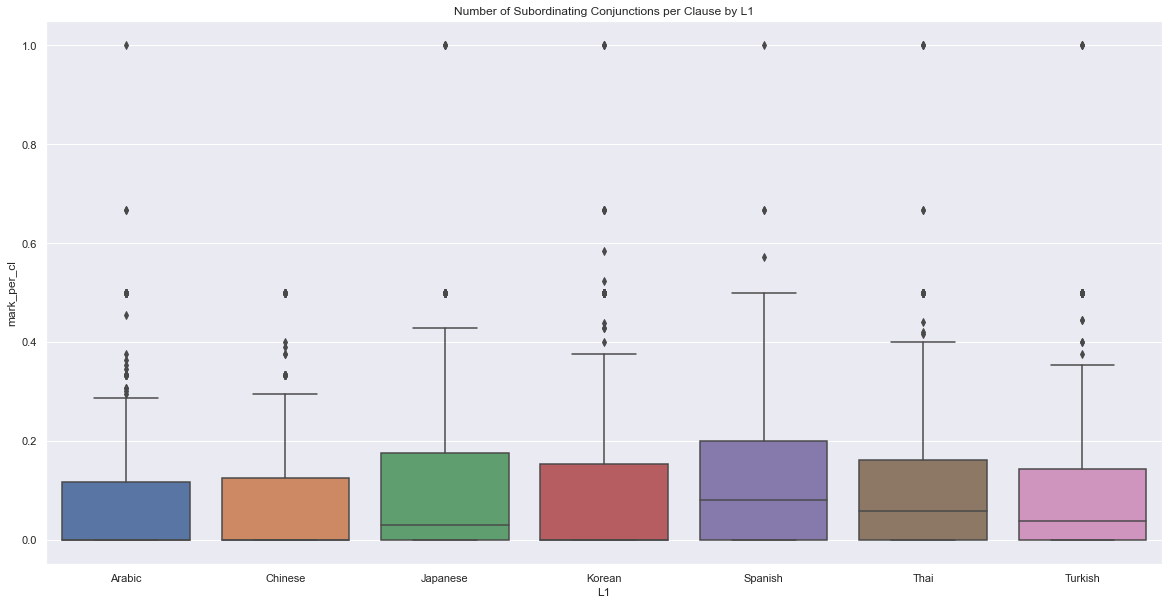

In [63]:
sns.boxplot(
    data=taassc_measures,
    x="L1",
    y="mark_per_cl"
).set(title="Number of Subordinating Conjunctions per Clause by L1")
plt.show()

More outliers...

In [64]:
taassc_measures[(taassc_measures["L1"] == "Arabic") & (taassc_measures["mark_per_cl"] == 1)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
109,14853,co0,Arabic,5,1.0,9.0,1.0,9.0,1.0,1.0


In [65]:
pelic[pelic["answer_id"] == 14853]["text"].iloc[0]

'And in the future, that GAP will probably INCREASE.'

There aren't any subordinating conjunctions in this essay, though...
I'm not sure how TAASSC got 1 subordinating conjunction per clause...

In [66]:
taassc_measures[(taassc_measures["L1"] == "Japanese") & (taassc_measures["mark_per_cl"] == 1)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
502,25148,hb2,Japanese,3,1.0,6.0,1.0,6.0,0.0,1.0
2518,25146,hb2,Japanese,3,1.0,8.0,1.0,8.0,0.0,1.0
2825,25147,hb2,Japanese,3,1.0,11.0,1.0,11.0,1.0,1.0
2438,15864,fh9,Japanese,5,1.0,9.0,1.0,9.0,0.0,1.0


In [67]:
pelic[pelic["answer_id"] == 25148]["text"].iloc[0]

'Because lower level is more dirty.'

This one was correct to have been assigned 1 subordinating conjunction per clause.

In [68]:
pelic[pelic["answer_id"] == 25146]["text"].iloc[0]

'Because the Cathedral is gothic,and Roman autentic.'

Same with this one.

In [69]:
pelic[pelic["answer_id"] == 25147]["text"].iloc[0]

'Because Pittsburgh is dedicaterd with area that success of air polution.'

This one is incorrect since there are 2 subordinating conjunctions.

In [70]:
pelic[pelic["answer_id"] == 15864]["text"].iloc[0]

'Because the growing population of urban poor threated them.'

This one is correct too.

In [71]:
taassc_measures[(taassc_measures["L1"] == "Korean") & (taassc_measures["mark_per_cl"] == 1)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
364,27461,al5,Korean,5,1.0,5.0,1.0,5.0,0.0,1.0
1069,27107,bq0,Korean,5,0.0,0.0,0.0,9.0,1.0,1.0
2293,27108,bq0,Korean,5,0.0,0.0,0.0,7.0,0.0,1.0


In [72]:
pelic[pelic["answer_id"] == 27461]["text"].iloc[0]

'because I was so sick.'

In [73]:
pelic[pelic["answer_id"] == 27107]["text"].iloc[0]

'While the baseball game is playing in the park,'

In [74]:
pelic[pelic["answer_id"] == 27108]["text"].iloc[0]

"because Monday was my mother's birthday"

These are all correct too.

In [75]:
taassc_measures[(taassc_measures["L1"] == "Spanish") & (taassc_measures["mark_per_cl"] == 1)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
2447,27831,ch0,Spanish,3,0.0,0.0,0.0,14.0,0.5,1.0


In [76]:
pelic[pelic["answer_id"] == 27831]["text"].iloc[0]

'Because the people needs a situation clear for undersand that to tell to them '

I'm not sure if this one is correct because I can't tell if "that" is being used as a complementizer or a demonstrative here.

In [77]:
taassc_measures[(taassc_measures["L1"] == "Thai") & (taassc_measures["mark_per_cl"] == 1)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
1103,24953,ci6,Thai,4,1.0,22.0,2.0,11.0,0.0,1.0
1247,13842,eu0,Thai,5,0.0,0.0,0.0,5.0,0.0,1.0
2964,14837,eu0,Thai,5,1.0,9.0,1.0,9.0,1.0,1.0


In [78]:
pelic[pelic["answer_id"] == 24953]["text"].iloc[0]

'phenomenon\nSome situation of the national that the science can not explain a phenomenon because the science can not fine the reason. '

This one is also correct... I think (it's kind of hard to tell with the line break).

In [79]:
taassc_measures[(taassc_measures["L1"] == "Turkish") & (taassc_measures["mark_per_cl"] == 1)]

,answer_id,anon_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
2280,15458,em0,Turkish,5,0.0,0.0,0.0,5.0,0.0,1.0
2582,28341,an1,Turkish,5,1.0,17.0,2.0,8.5,0.0,1.0
3265,15833,bs8,Turkish,5,1.0,9.0,1.0,9.0,1.0,1.0


In [80]:
pelic[pelic["answer_id"] == 15458]["text"].iloc[0]

'that area had been catostrophe'

This one is definitely incorrect since there are no subordinating conjunctions.

In [81]:
pelic[pelic["answer_id"] == 28341]["text"].iloc[0]

"Plagiarism is the use of another's original words or ideas as though they were your own."

This one is correct.

In [82]:
sub_filtered = taassc_measures.copy()
for L1 in sub_filtered["L1"].unique():
    quants = quantiles(sub_filtered[sub_filtered["L1"] == L1]["mark_per_cl"], n=20) # 5th, 10th, ..., 90th, 95th percentiles
    sub_filtered = sub_filtered[
        (sub_filtered["L1"] != L1) |
        ((sub_filtered["mark_per_cl"] >= quants[0]) & (sub_filtered["mark_per_cl"] <= quants[-1]))  # Filter for only middle 90% of values
    ]

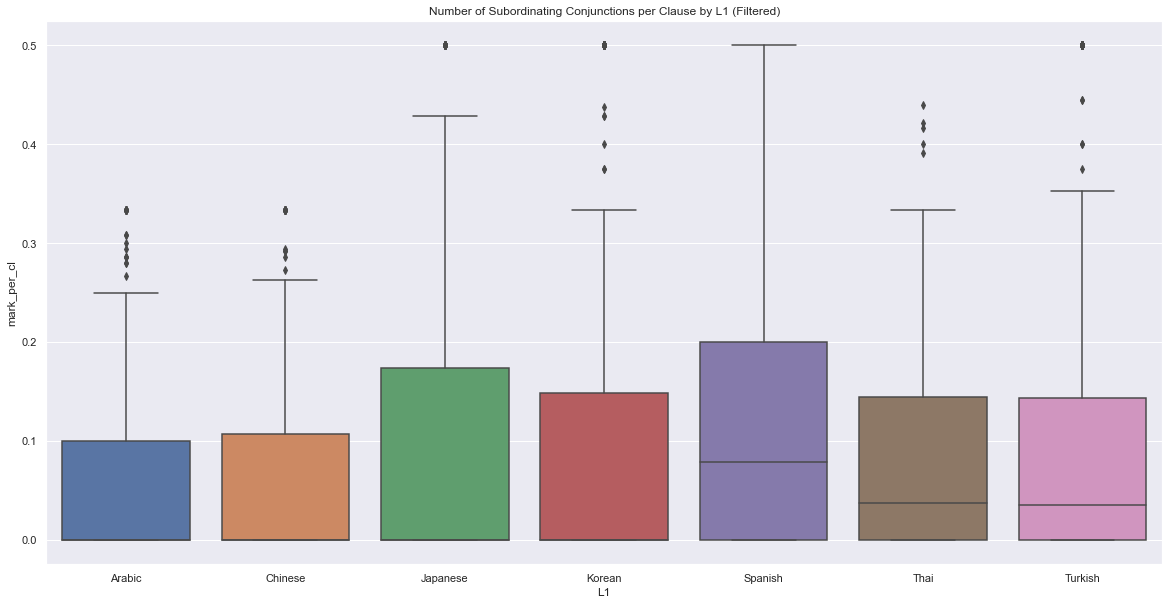

In [83]:
sns.boxplot(
    data=sub_filtered,
    x="L1",
    y="mark_per_cl"
).set(title="Number of Subordinating Conjunctions per Clause by L1 (Filtered)")
plt.show()

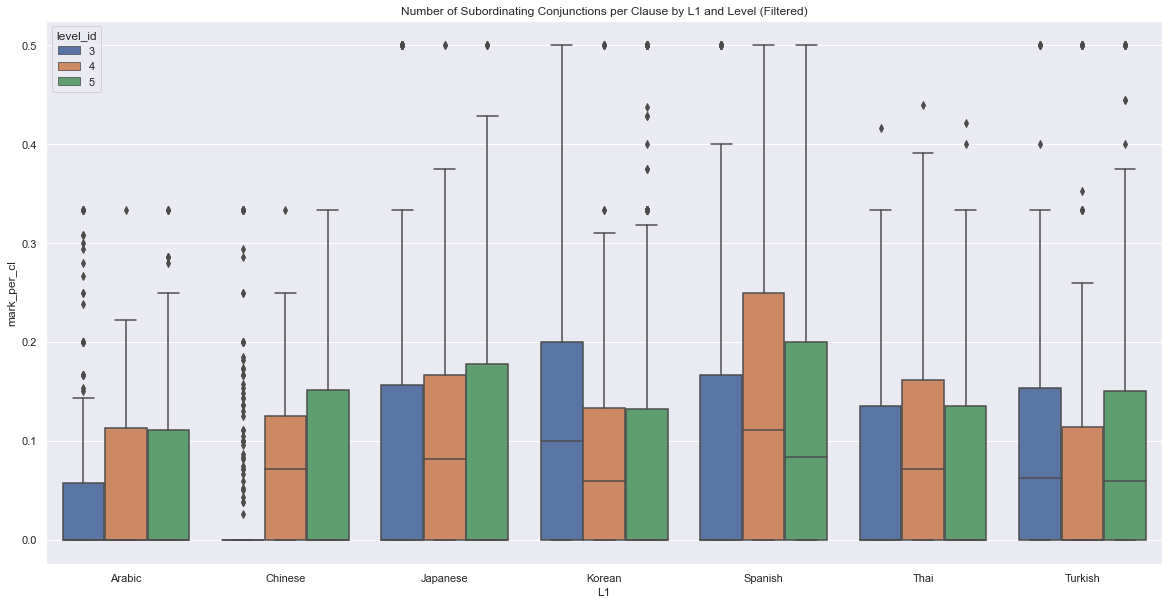

In [84]:
sns.boxplot(
    data=sub_filtered,
    x="L1",
    y="mark_per_cl",
    hue="level_id"
).set(title="Number of Subordinating Conjunctions per Clause by L1 and Level (Filtered)")
plt.show()

In [85]:
print("t-tests by L1:")
for L1 in sub_filtered["L1"].unique():
    print(f"{L1}: {stats.ttest_ind(sub_filtered[(sub_filtered['L1'] == L1) & (sub_filtered['level_id'] == 5)]['mark_per_cl'], sub_filtered[(sub_filtered['L1'] == L1) & (sub_filtered['level_id'] == 3)]['mark_per_cl'], alternative='greater').pvalue}")

t-tests by L1:
Arabic: 0.0048878745045235015
Chinese: 5.653073557932015e-05
Japanese: 0.8476541575206862
Korean: 0.9992678337764281
Spanish: 0.045711153752026744
Thai: 0.4345570163762743
Turkish: 0.24423889051454306


It looks like Arabic, Chinese, and Spanish all test significant for an increase in number of subordinating conjunctions.

## Conclusion

After having seen the prevalence of outliers in the original data, I had planned to give up on statistical tests and simply visualize the data, as I didn't feel comfortable drawing statistical conclusions when I knew that the data was so erroneous.
However, after Sean suggested during my presentation that I limit myself to the middle 95% of essays, I decided to use that idea and perform statistical tests on the filtered data instead.
Although this does remove technically valid essays from the dataset, it seems to be a necessary measure to mitigate the effects of TAASSC's miscalculation of syntactic measures for some essays.

Although trends naturally vary between syntactic measures, ANOVA tests show that the variation in the distribution of syntactic measure values is significant for all syntactic measures.
More interestingly, two-sample t-tests show that the Chinese essays in particular consistently have higher values for syntactic measures on average for higher proficiency levels than lower proficiency levels, while the same trend wasn't observed in the distributions of values for any other L1.